In [1]:
import matplotlib.pyplot as plt
import numpy as np
from abc import ABC, abstractmethod


In [2]:
class Bandit(ABC):
    """
    Abstract base class representing a bandit problem.

    Attributes:
        Bandit_Reward (list): List of rewards for each bandit arm.
        NumberOfTrials (int): Number of trials for the bandit.

    Methods:
        __init__(): Initializes an instance of the Bandit class.
        pull(): Abstract method representing action selection for the bandit.

    Note:
        This is an abstract class and should be inherited to implement specific bandit algorithms.
    """

    Bandit_Reward = [1, 2, 3, 4]
    NumberOfTrials = 20000

    @abstractmethod
    def __init__(self):
        """Abstract method to initialize an instance of the Bandit class."""
        pass

    @abstractmethod
    def pull(self):
        """Abstract method representing action selection for the bandit."""
        pass



In [3]:
class EpsilonGreedy(Bandit):
    
    """
    Epsilon-Greedy algorithm for the bandit problem.

    Attributes:
        epsilon (float): Epsilon value for exploration.
        q_values (numpy.array): Estimated action values for each arm.
        action_counts (numpy.array): Number of times each action was chosen.

    Methods:
        __init__(self, epsilon): Initialize an instance of the EpsilonGreedy class.
        pull(self): Perform an action selection based on epsilon-greedy strategy.
    """

    def __init__(self, epsilon):
        self.epsilon = epsilon
        self.q_values = np.zeros(len(Bandit.Bandit_Reward))
        self.action_counts = np.zeros(len(Bandit.Bandit_Reward))

    def pull(self):
        if np.random.random() < self.epsilon:
            action = np.random.choice(len(Bandit.Bandit_Reward))
        else:
            action = np.argmax(self.q_values)
        
        reward = Bandit.Bandit_Reward[action]
        self.action_counts[action] += 1
        self.q_values[action] += (reward - self.q_values[action]) / self.action_counts[action]

        return reward

class ThompsonSampling(Bandit):
    
    """
    Thompson Sampling algorithm for the bandit problem.

    Attributes:
        precision (float): Precision parameter for Beta distribution.
        alpha (numpy.array): Alpha parameters for Beta distribution.
        beta (numpy.array): Beta parameters for Beta distribution.

    Methods:
        __init__(self, precision): Initialize an instance of the ThompsonSampling class.
        pull(self): Perform an action selection based on Thompson Sampling.
    """

    def __init__(self, precision):
        self.precision = precision
        self.alpha = np.ones(len(Bandit.Bandit_Reward))
        self.beta = np.ones(len(Bandit.Bandit_Reward))

    def pull(self):
        sampled_theta = np.random.beta(self.alpha, self.beta)
        action = np.argmax(sampled_theta)
        
        reward = Bandit.Bandit_Reward[action]

        # Update alpha and beta based on observed reward
        if reward == 1:
            self.alpha[action] += 1
        else:
            self.beta[action] += 1

        return reward

# Example usage
epsilon_value = 0.1
epsilon_greedy_bandit = EpsilonGreedy(epsilon_value)

precision_value = 2.0
thompson_sampling_bandit = ThompsonSampling(precision_value)

In [4]:
def run_experiment(bandit, num_trials):
    """
    Run an experiment for a specified number of trials with a given bandit.

    Args:
        bandit: An instance of a bandit class (e.g., EpsilonGreedy, ThompsonSampling).
        num_trials (int): The number of trials for the experiment.

    Returns:
        tuple: A tuple containing rewards and cumulative rewards for each trial.
    """

    rewards = []
    cumulative_rewards = [0]

    for t in range(num_trials):
        reward = bandit.pull()
        rewards.append(reward)
        cumulative_rewards.append(cumulative_rewards[-1] + reward)

    return rewards, cumulative_rewards

# Experiment parameters
num_trials = Bandit.NumberOfTrials

# Run Epsilon-Greedy experiment
epsilon_value = 0.1  # Epsilon parameter for Epsilon-Greedy
epsilon_greedy_bandit = EpsilonGreedy(epsilon_value)
epsilon_greedy_rewards, epsilon_greedy_cumulative_rewards = run_experiment(epsilon_greedy_bandit, num_trials)

# Run Thompson Sampling experiment
precision_value = 2.0  # Precision parameter for Thompson Sampling
thompson_sampling_bandit = ThompsonSampling(precision_value)
thompson_sampling_rewards, thompson_sampling_cumulative_rewards = run_experiment(thompson_sampling_bandit, num_trials)


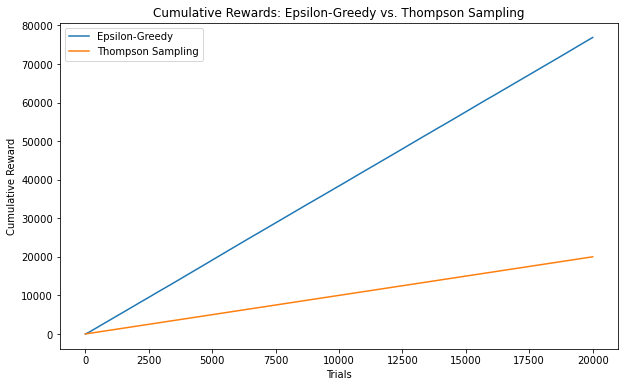

In [5]:
def plot_cumulative_rewards(epsilon_greedy_cumulative_rewards, thompson_sampling_cumulative_rewards):
    plt.figure(figsize=(10, 6))
    plt.plot(epsilon_greedy_cumulative_rewards, label='Epsilon-Greedy')
    plt.plot(thompson_sampling_cumulative_rewards, label='Thompson Sampling')
    plt.xlabel('Trials')
    plt.ylabel('Cumulative Reward')
    plt.legend()
    plt.title('Cumulative Rewards: Epsilon-Greedy vs. Thompson Sampling')
    plt.show()

# Plot cumulative rewards for each algorithm
plot_cumulative_rewards(epsilon_greedy_cumulative_rewards, thompson_sampling_cumulative_rewards)


In [6]:
import csv

def save_rewards_to_csv(filename, bandit, rewards, algorithm):
    data = zip([bandit] * len(rewards), rewards, [algorithm] * len(rewards))
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Bandit', 'Reward', 'Algorithm'])
        writer.writerows(data)

# Save rewards to CSV
save_rewards_to_csv('rewards.csv', 'Bandit1', epsilon_greedy_rewards, 'Epsilon-Greedy')
save_rewards_to_csv('rewards.csv', 'Bandit1', thompson_sampling_rewards, 'Thompson Sampling')



In [7]:
print("Cumulative Reward (Epsilon-Greedy):", epsilon_greedy_cumulative_rewards[-1])
print("Cumulative Reward (Thompson Sampling):", thompson_sampling_cumulative_rewards[-1])


Cumulative Reward (Epsilon-Greedy): 76869
Cumulative Reward (Thompson Sampling): 20009


In [8]:
max_possible_reward = max(Bandit.Bandit_Reward) * Bandit.NumberOfTrials
epsilon_greedy_regret = max_possible_reward - epsilon_greedy_cumulative_rewards[-1]
thompson_sampling_regret = max_possible_reward - thompson_sampling_cumulative_rewards[-1]

print("Cumulative Regret (Epsilon-Greedy):", epsilon_greedy_regret)
print("Cumulative Regret (Thompson Sampling):", thompson_sampling_regret)


Cumulative Regret (Epsilon-Greedy): 3131
Cumulative Regret (Thompson Sampling): 59991
